
Forecasting for Mati:

Year=2025, Future Prediction=26.213855
Year=2026, Future Prediction=30.771218
Year=2027, Future Prediction=26.485484
Year=2028, Future Prediction=25.882179
Year=2029, Future Prediction=27.434272
Year=2030, Future Prediction=28.413425
Year=2031, Future Prediction=26.791837
Year=2032, Future Prediction=26.941606
Year=2033, Future Prediction=27.566546
Year=2034, Future Prediction=27.612565
Year=2035, Future Prediction=27.051218
Year=2036, Future Prediction=27.249797


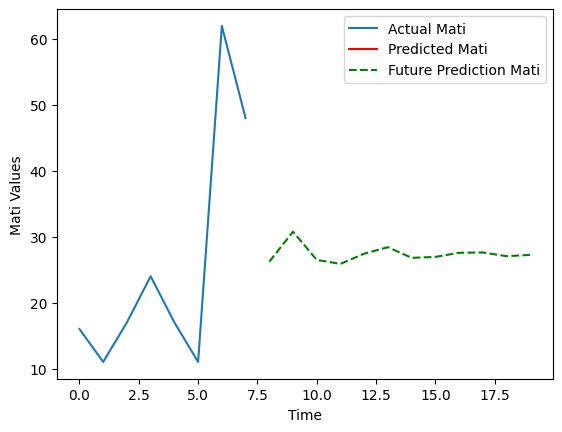


Forecasting for Ringan:



/home/fnilvu/.conda/envs/tf/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


Year=2025, Future Prediction=81.730100


/home/fnilvu/.conda/envs/tf/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Year=2026, Future Prediction=74.737729


/home/fnilvu/.conda/envs/tf/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Year=2027, Future Prediction=109.950628
Year=2028, Future Prediction=131.753787
Year=2029, Future Prediction=126.405919
Year=2030, Future Prediction=148.810796


/home/fnilvu/.conda/envs/tf/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Year=2031, Future Prediction=140.861239


/home/fnilvu/.conda/envs/tf/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Year=2032, Future Prediction=120.082974
Year=2033, Future Prediction=123.489862
Year=2034, Future Prediction=96.887202
Year=2035, Future Prediction=81.424428


/home/fnilvu/.conda/envs/tf/lib/python3.9/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Year=2036, Future Prediction=86.914871


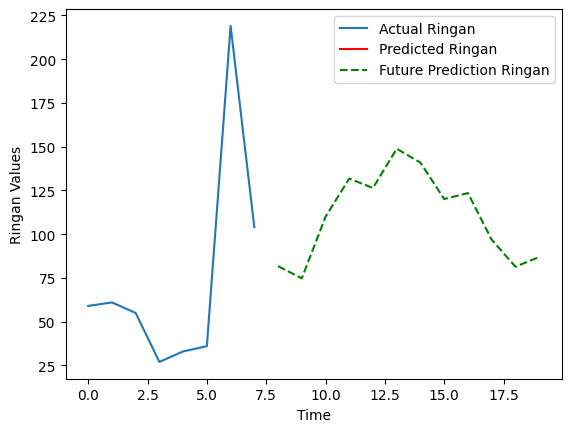


Forecasting for Berat:

Year=2025, Future Prediction=82.012542
Year=2026, Future Prediction=80.149233
Year=2027, Future Prediction=69.356161
Year=2028, Future Prediction=76.942588
Year=2029, Future Prediction=87.449042
Year=2030, Future Prediction=88.428146
Year=2031, Future Prediction=84.547957
Year=2032, Future Prediction=88.914832
Year=2033, Future Prediction=92.227348
Year=2034, Future Prediction=87.475039
Year=2035, Future Prediction=81.939693
Year=2036, Future Prediction=83.084608


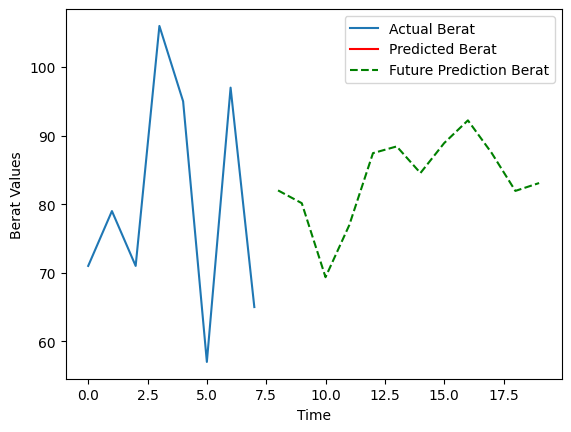

In [86]:
from pandas import DataFrame, to_datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA

def forecast_and_plot(df, column):
    series = df[column]
    X = series.values
    size = int(len(X) * 0.66)
    train, test = X[0:size], X[size:len(X)]
    history = [x for x in train]
    predictions = list()

    print(f"\nForecasting for {column}:\n")

    # Walk-forward validation
    year = 2025
    for t in range(size, len(test)):
        model = ARIMA(history, order=(5, 0, 0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        predictions.append(yhat)
        obs = test[t]
        history.append(obs)
        print('Year=%s, Predicted=%f, Expected=%f' % (year, yhat, obs))

    # Predict the upcoming year
    future_steps = 12  # Change this to the number of steps you want to predict for the upcoming year
    future_predictions = list()
    year = 2024
    for _ in range(future_steps):
        model = ARIMA(history, order=(5, 0, 0))
        model_fit = model.fit()
        output = model_fit.forecast()
        yhat = output[0]
        future_predictions.append(yhat)
        history.append(yhat)
        year += 1
        print('Year=%s, Future Prediction=%f' % (year, yhat))

    # Plot forecasts against actual outcomes
    pyplot.plot(test, label='Actual ' + column)
    pyplot.plot(predictions, color='red', label='Predicted ' + column)
    pyplot.plot(range(len(test), len(test) + future_steps), future_predictions, color='green', linestyle='--', label='Future Prediction ' + column)
    pyplot.xlabel('Time')
    pyplot.ylabel(column + ' Values')
    pyplot.legend()
    pyplot.show()

# Load the dataset
data = {
    'Tahun': list(range(2003, 2024)),
    'Ringan': [153, 101, 59, 223, 104, 162, 176, 100, 94, 82, 75, 49, 52, 59, 61, 55, 27, 33, 36, 219, 104],
    'Berat': [84, 51, 61, 82, 83, 74, 83, 94, 101, 105, 111, 78, 78, 71, 79, 71, 106, 95, 57, 97, 65],
    'Mati': [31, 22, 23, 27, 19, 19, 44, 15, 22, 29, 46, 32, 25, 16, 11, 17, 24, 17, 11, 62, 48]
}

df = DataFrame(data)
df['Tahun'] = to_datetime(df['Tahun'], format='%Y')
df.set_index('Tahun', inplace=True)

# Columns for forecasting
columns_to_forecast = ['Mati', 'Ringan', 'Berat']

# Call the function for each column
for column in columns_to_forecast:
    forecast_and_plot(df, column)
